In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from ml_tooling import Model
from ml_tooling.data import Dataset

In [5]:
class BostonData(Dataset):
    def load_prediction_data(self, idx):
        x, _ = load_boston(return_X_y=True)
        return x[idx] # Return given observation

    def load_training_data(self):
        return load_boston(return_X_y=True)

# Instantiate a model with an estimator
linear_boston = Model(LinearRegression())

# Instantiate the data
data = BostonData()
# Split training and test data
data.create_train_test()

<BostonData - Dataset>

In [9]:
# Score the estimator yielding a Result object
result = linear_boston.score_estimator(data)
print(result)

[13:29:40] - Scoring estimator...


<Result LinearRegression: {'r2': 0.68}>


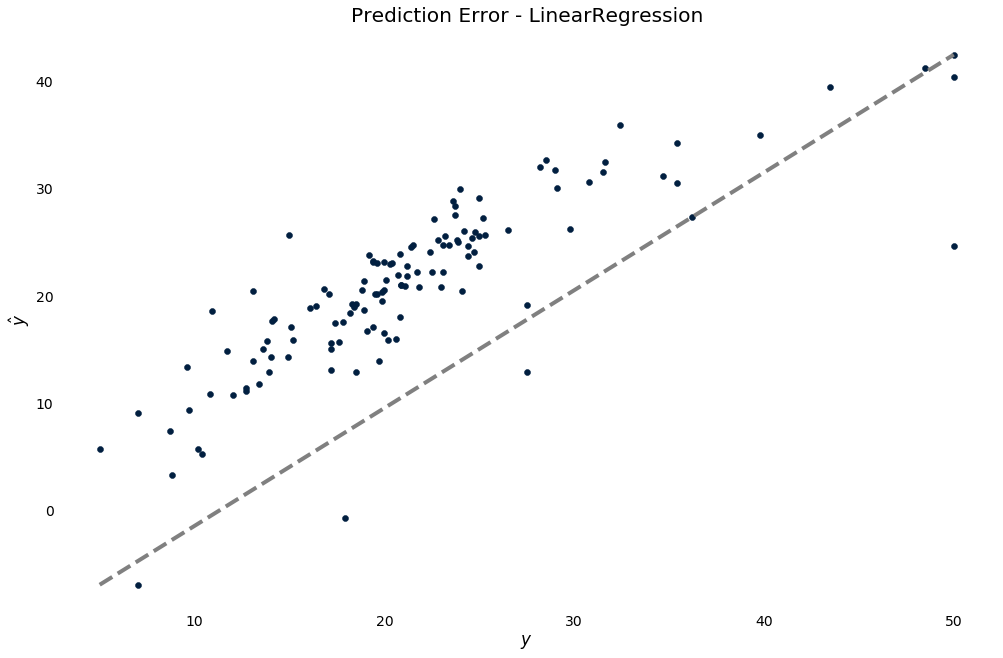

In [7]:
# Visualize the result
result.plot.prediction_error()

# Scaling

In [12]:
from sklearn.pipeline import Pipeline

from ml_tooling.transformers import DFStandardScaler

scaled = Pipeline([
    ('scale', DFStandardScaler()),
    ('model', LinearRegression())
])

In [13]:
scaled_linear = Model(scaled)
result = scaled_linear.score_estimator(data)
result

[13:33:50] - Scoring estimator...


<Result LinearRegression: {'r2': 0.68}>

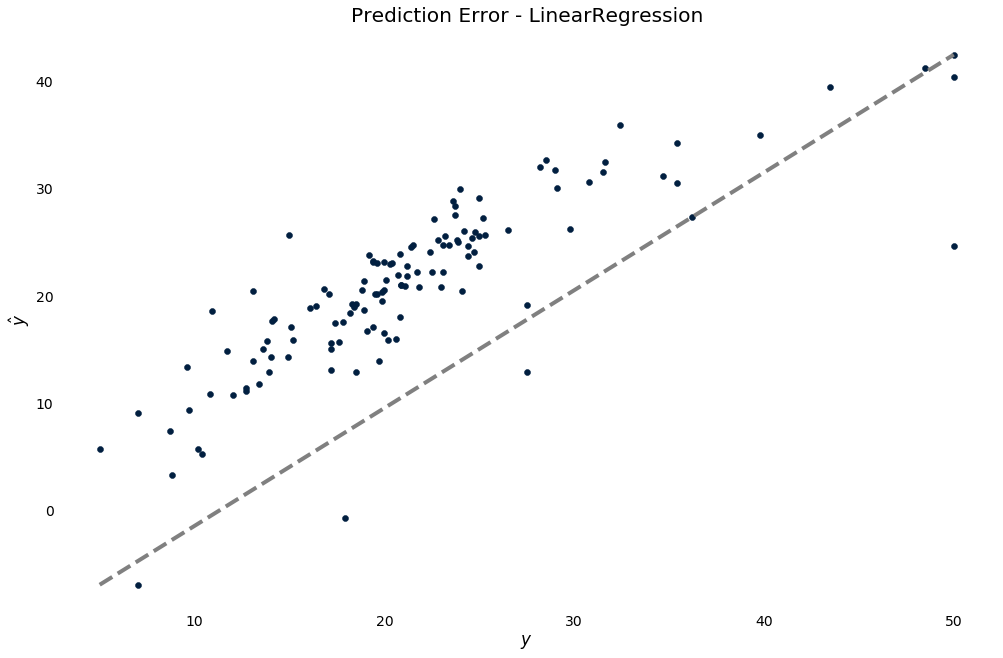

In [14]:
result.plot.prediction_error()

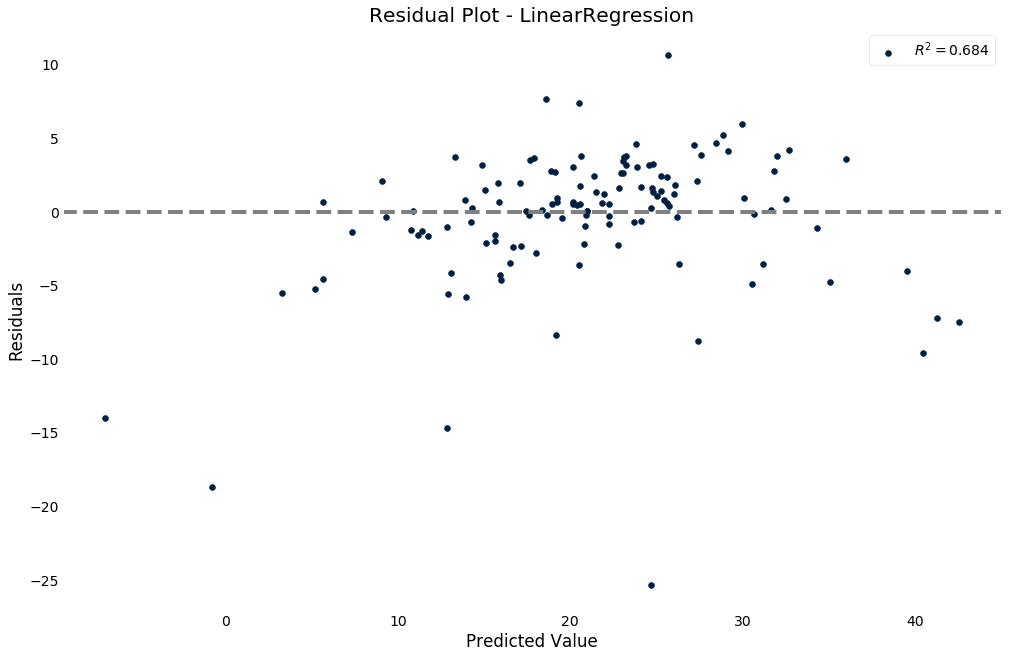

In [15]:
result.plot.residuals()

In [22]:
from sklearn.linear_model import RidgeCV, ElasticNetCV
from ml_tooling.transformers import Select

In [23]:
def create_pipeline(estimator):
    return Pipeline([
        ('select', Select(['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX', 'NOX',  'CRIM'])),
        ('scaler', DFStandardScaler()),
        ('estimator', estimator)
    ])

In [24]:
best_model, results = Model.test_estimators(data, [create_pipeline(est) 
                                                   for est
                                                   in [LinearRegression(),
                                                       RidgeCV(cv=100),
                                                       ElasticNetCV(cv=100)]
                                                  ]
                                            )

[13:36:01] - Training estimator 1/3: LinearRegression
[13:36:01] - Scoring estimator...
/home/valentin/git/ml_tooling/venv/lib/python3.6/site-packages/ml_tooling/transformers/select.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return X[self.columns]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

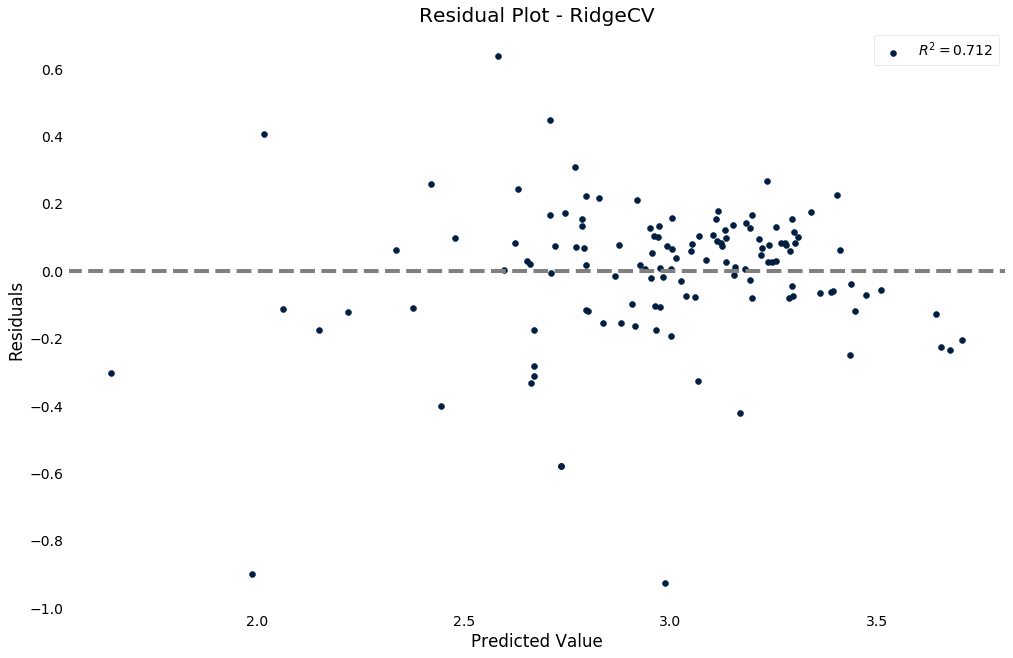

In [20]:
results.plot.residuals()

In [22]:
best_model.estimator.named_steps['estimator'].coef_

array([-0.20540134,  0.09404735, -0.06838742,  0.0278824 , -0.02643275,
       -0.02007056, -0.07268972])

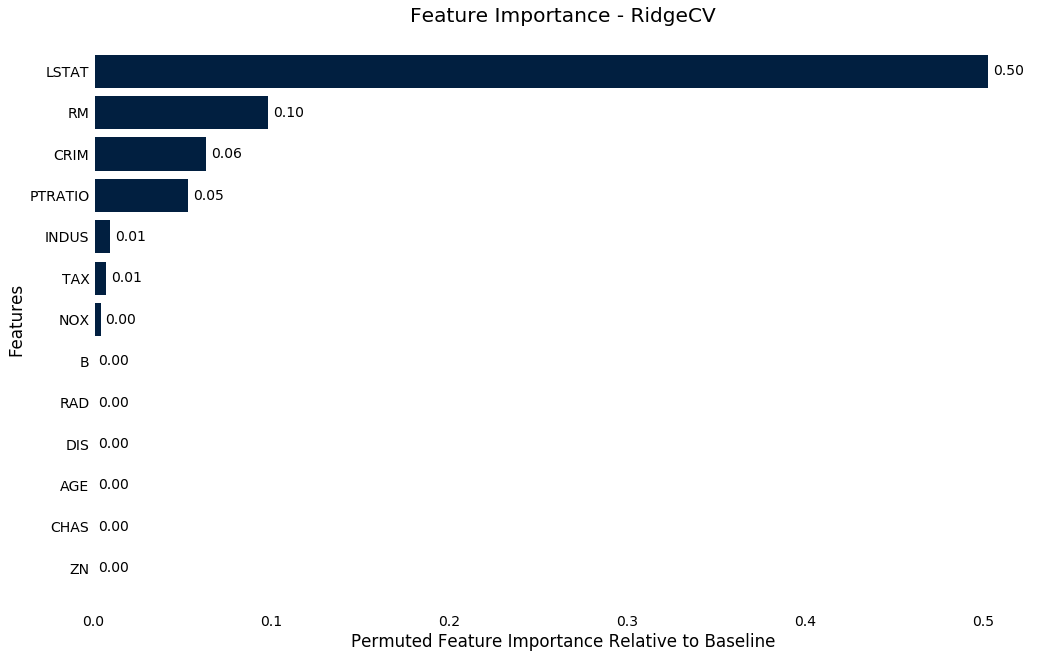

In [23]:
results.plot.feature_importance(1000)